# Statistical analysis of incident probability and causes on RATP metro lines

## Methodology

The official RATP Twitter accounts frequently update operational status of their lines like the following one. In this case, at 16:46 the line 1 account reports an operational incident (the line is cut between two stations) due to a technical problem (very strange one...they have some difficulty managing the line 😂)

<img width="450" src="https://user-images.githubusercontent.com/4027283/52820320-f9343580-30ab-11e9-8f15-4f337cd4a4ae.png">

With the Python script contained in this notebook, the three *highlighted* information in this tweet is converted to a line inside a pandas dataframe (a table) containing mainly three columns:

1. `time`: every day is divided into 24 *exact* hours: 00:00 – 00:59, ..., 23:00 – 23:59.
2. `is_incident`: if an incident (or more) is reported during this hour.
3. `incident_cause`: the cause of the incident. In case of several incidents, record the most frequent cause. In general it's still rare to have two separate incidents of different nature.

| `time`                   | `is_incident` | `incident_cause` |
| ------------------------ | ------------- | ---------------- |
| ...                      |               |                  |
| 2019-02-14 15:00 – 15:59 | `False`       | N/A              |
| 2019-02-14 16:00 – 16:59 | `True`        | technique        |
| 2019-02-14 17:00 – 17:59 | `False`       | N/A              |
| ...                      |               |                  |

Since the time of incident is recorded to be only accurate to the hour, the statistical results reported below should be interprepted with caution. For instance, if I announce that in the hour 17:00 – 17:59 the probability of encountering incidents on metro line 2 is 3%, that's all...I have no further statistical information on when exactly the incident may happen MORE LIKELY in that hour. It may happen that actually more incidents may take place from 17:45 to 17:59, but no estimation can be made with the current design, due to the partitioning of one day only to 24 hours.

## Source code

Feel free to skip if you do not want to know the details.

The source code is in the `ratpmetro` folder. It mainly depends on the following Python libraries: `pandas` (for data analysis), `tweepy` (for downloading tweets) and `matplotlib` (for visualization). The documentation can be found [here](http://ratpmetro.readthedocs.io).

To begin with, import the `RATPMetroTweetsAnalyzer` class.

In [2]:
from ratpmetro import RATPMetroTweetsAnalyzer
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
%matplotlib inline

## First example with the RATP metro line 2

We will first take an example of the metro line 2 (which I take everyday for my work), in the year 2018. In the `RATPTweetsAnalyzer` class, you can find a pandas dataframe `df` containing the raw tweets downloaded from the official RATP Twitter account. After processing (using the method `process()`) two additional columns will appear

1. `is_incident`: whether the current tweet reports an incident (True or False)
2. `incident_cause`: the cause of this incident

An example with the last 10 tweets.

In [3]:
ratp = RATPMetroTweetsAnalyzer()
ratp.load(line=2)
ratp.process()
ratp.df.tail(10)

,tweet,is_incident,incident_cause
time,,,
2019-02-12 08:52:29+01:00,"08:51, la rame stationne à Jaures en dir. de N...",False,N/A
2019-02-12 08:57:28+01:00,"08:55, le trafic est perturbé sur la ligne (ma...",True,voyageur
2019-02-12 09:40:32+01:00,"09:39, le trafic est rétabli sur la ligne (mal...",False,N/A
2019-02-13 08:53:28+01:00,"08:52, le trafic est perturbé sur la ligne (in...",True,technique
2019-02-13 08:57:29+01:00,"@Berlin_Mule Bonjour, il y a in incident techn...",False,N/A
2019-02-13 09:43:25+01:00,Une interruption entre Barbés et CDG Étoile es...,False,N/A
2019-02-13 09:48:28+01:00,"09:47, le trafic est interrompu entre Barbes-R...",True,technique
2019-02-13 09:53:29+01:00,"09:52, le trafic est interrompu entre Barbes-R...",True,technique
2019-02-13 10:12:35+01:00,"10:11, le trafic reprend progressivement sur l...",False,N/A


### Mean probability of operational incidents

The average probability of encountering incidents in the year 2018 is expected to be 1.9%.

In [4]:
ratp.mean_incident_prob(year=2018)

0.01872146118721461

### Variation in the probability of incidents

The probability of encountering problems is by no means a constant value. Around 04:00 all metro systems are closed so it's impossible to catch one! In the meanwhile at rush hours you are more likely to hate RATP metros. That's why we propose a `plot_prob(by="hour", year=None)` method capable of plotting (aggregated, marginal) probability variation with respect to a given variable.

#### By hour

Here the value refers in fact to the next following hour starting from this value. For example, the value of 9 below refers to the hour begining from 09:00 to 09:59.

1. As said before it's natural to have lower probabilities of having problems when everyone sleeps (from midnight to 04:59): even the metro does!
2. We get a first peak in the morning from 08:00 to 09:59, where the probability of having problems is 3%.
3. The maximal probability of 4% can be found from 18:00 to 18:59.

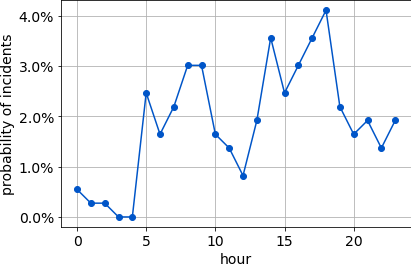

In [5]:
ratp.plot_prob(by="hour", year=2018)
plt.tight_layout()

#### By weekday

1. On Tuesday I may have more problems on the line 2.
2. It's better to take the line 2 on weekends...especially on Sunday!

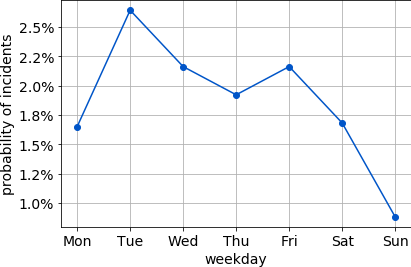

In [6]:
ratp.plot_prob(by="weekday", year=2018)
plt.tight_layout()

#### By hour-weekday

This representation is more accurate as it tells us the probability of incidents for a given hour (in fact in the next following hour) and a specific weekday.

1. Black Wednesday when I leave work at 18:00, as there is nearly 9% chance that the line 2 will not work properly!
2. Also lots of problems On Tuesday when I go to work from 08:00 to 09:59.
3. No problem at all on Sunday until 18:00!

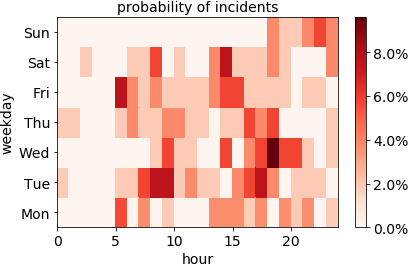

In [7]:
ratp.plot_prob(by="hour-weekday", year=2018)
plt.tight_layout()

#### By month

1. People on the line 2 take lots of vacations!! On Janurary, May (because of *ponts*?), Auguest and September.
2. Yes, both on Auguest and September.

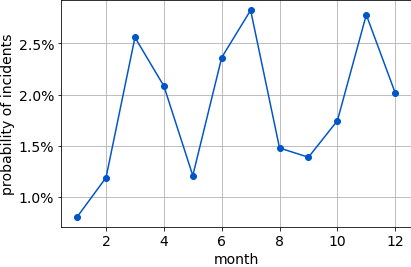

In [8]:
ratp.plot_prob(by="month", year=2018)
plt.tight_layout()

#### By month-weekday

1. In November never take line 2 on Wednesday.

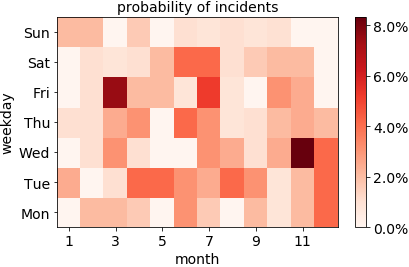

In [9]:
ratp.plot_prob(by="month-weekday", year=2018)
plt.tight_layout()

#### By year

1. Because of the election of E. M. ??

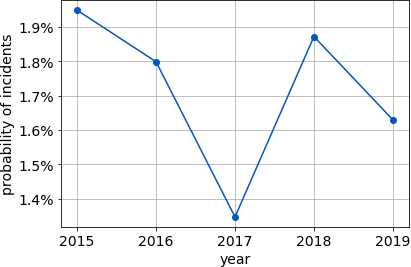

In [10]:
ratp.plot_prob(by="year")
plt.tight_layout()

#### By month-year

1. When data is not available, the case will be blank (begining of 2015 due to lack of tweets, and after Feburary since it's in the future).

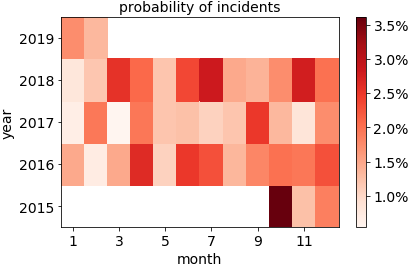

In [11]:
ratp.plot_prob(by="month-year")
plt.tight_layout()

### Most frequent incidents causes

It seems that nearly half of the incidents come from us. Also, 9% is due to unattended bags...

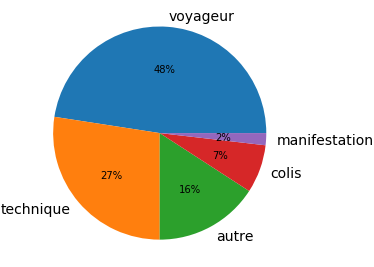

In [12]:
ratp.plot_cause(year=2018)
plt.tight_layout()

## All RATP metro lines

We will now perform similar analyses on all RATP metro lines.

### Rankings in terms of their mean probability of incidents

1. Line 13 is beaten by line 4!
2. Line 14 is clearly the winner, due to its automatism and shorter distance (15 minutes).

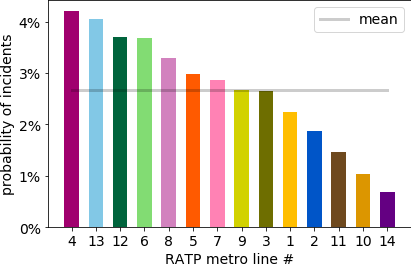

In [14]:
lines = np.arange(1, 15)
mean_incident_prob = np.zeros(len(lines))
color = [None] * len(lines)
ratp_line = {}
for i, line in enumerate(lines):
    ratp_line[line] = RATPMetroTweetsAnalyzer()
    ratp_line[line].load(line=line)
    ratp_line[line].process()
    mean_incident_prob[i] = ratp_line[line].mean_incident_prob(year=2018)
    color[i] = ratp_line[line].color

idx = np.argsort(mean_incident_prob)[::-1]  # descending order
x = lines[idx]
y = mean_incident_prob[idx]
color = np.array(color)[idx]
plt.bar(lines, y, width=0.6, color=color)

mean = mean_incident_prob.mean()
plt.plot((lines.min(), lines.max()), (mean, mean), "k-", linewidth=3, alpha=0.2, label="mean")

plt.xticks(lines, x)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.0%}"))
plt.xlabel("RATP metro line #")
plt.ylabel("probability of incidents")
plt.legend()
plt.tight_layout()

### Hour-weekday plot for each line

1. For comparison purposes the maximum probability in the colorbars is fixed to 15%. The best line 14 is nearly blank, indicating that the probability of incidents is low. The lines 4 and 13 on the other hand are redder...

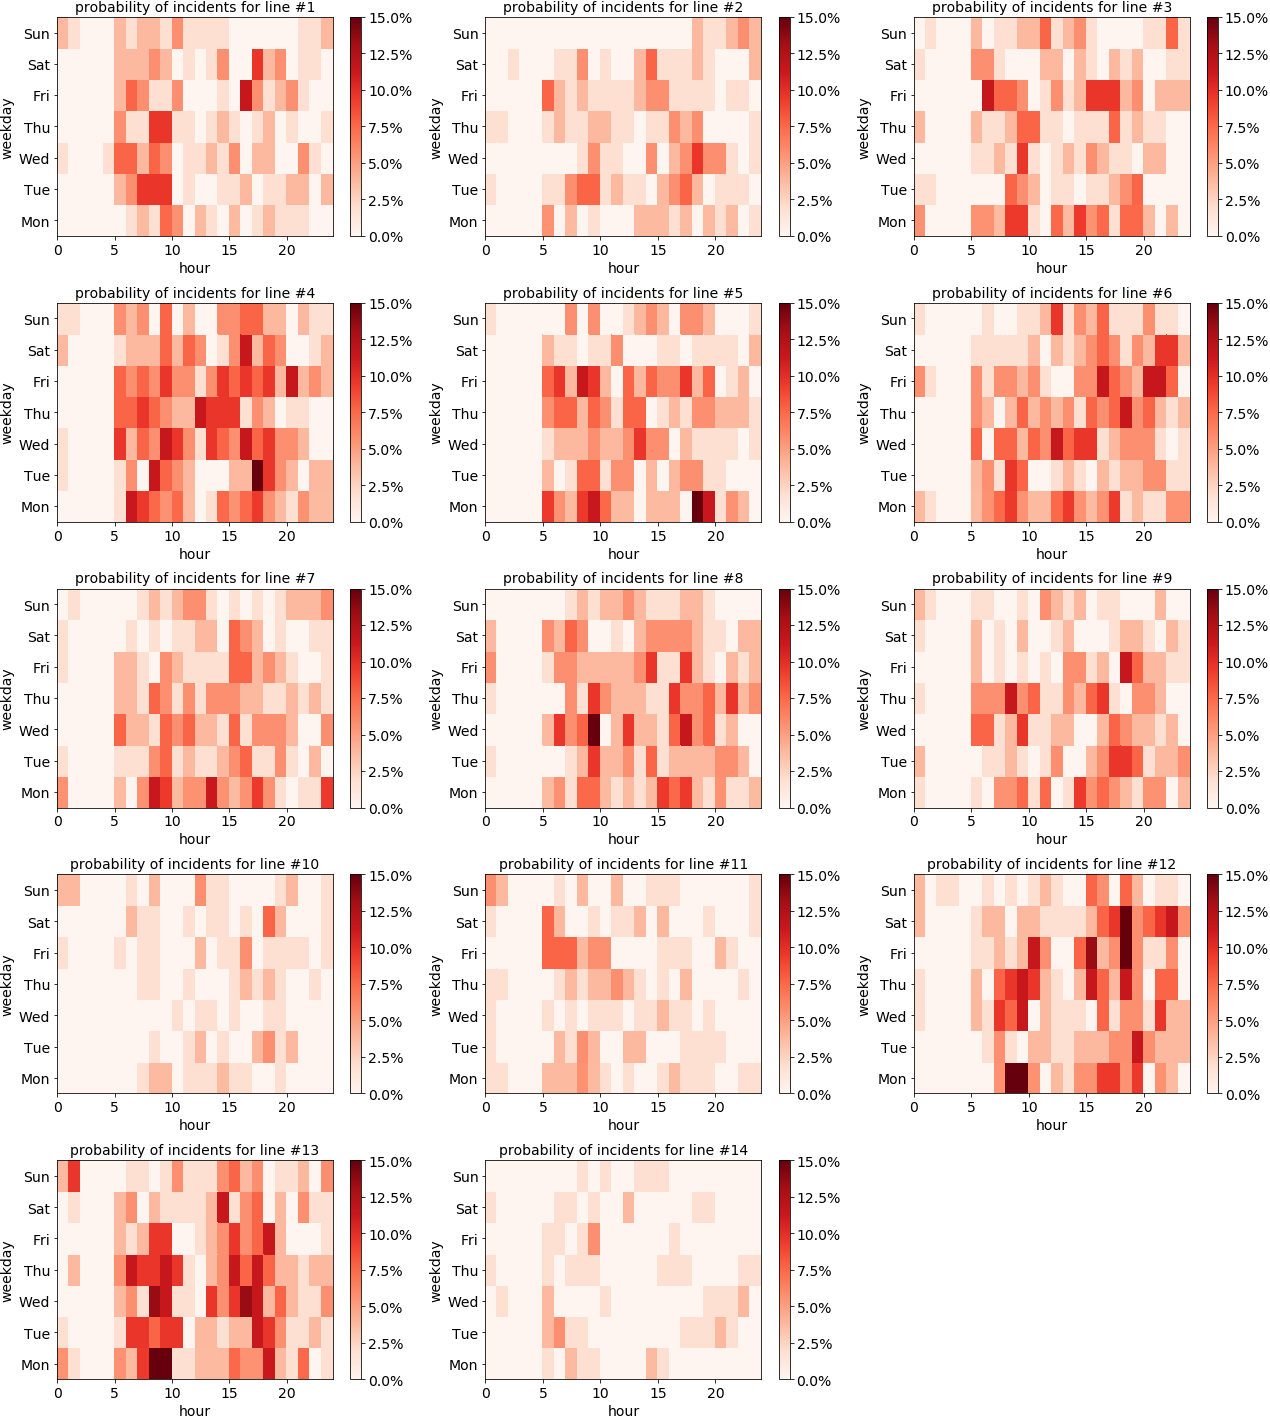

In [7]:
c_mean = np.zeros((len(lines), 24, 7))
plt.figure(figsize=(18, 20))
for i, line in enumerate(lines):
    plt.subplot(5, 3, i + 1)
    xx, yy, c_mean[i] = ratp_line[line].plot_prob(by="hour-weekday", year=2018, vmax=0.15)
    plt.title(plt.gca().get_title() + " for line #" + str(line))

plt.tight_layout()

### Mean hour-weekday plot

1. In each hour-weekday block we calculate and plot here the average probability among all lines.
2. It seems like that, the worst timing to take metro is on Monday morning from 08:00 to 09:59...Logic!!

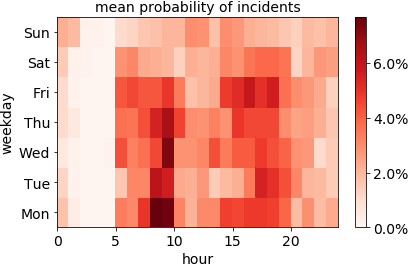

In [8]:
plt.pcolormesh(xx, yy, c_mean.mean(axis=0), cmap="Reds")
plt.yticks(np.linspace(0.5, 6.5, 7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("hour")
plt.ylabel("weekday")
plt.colorbar(format=FuncFormatter(lambda y, _: "{:.1%}".format(y)))
plt.title("mean probability of incidents")
plt.tight_layout()

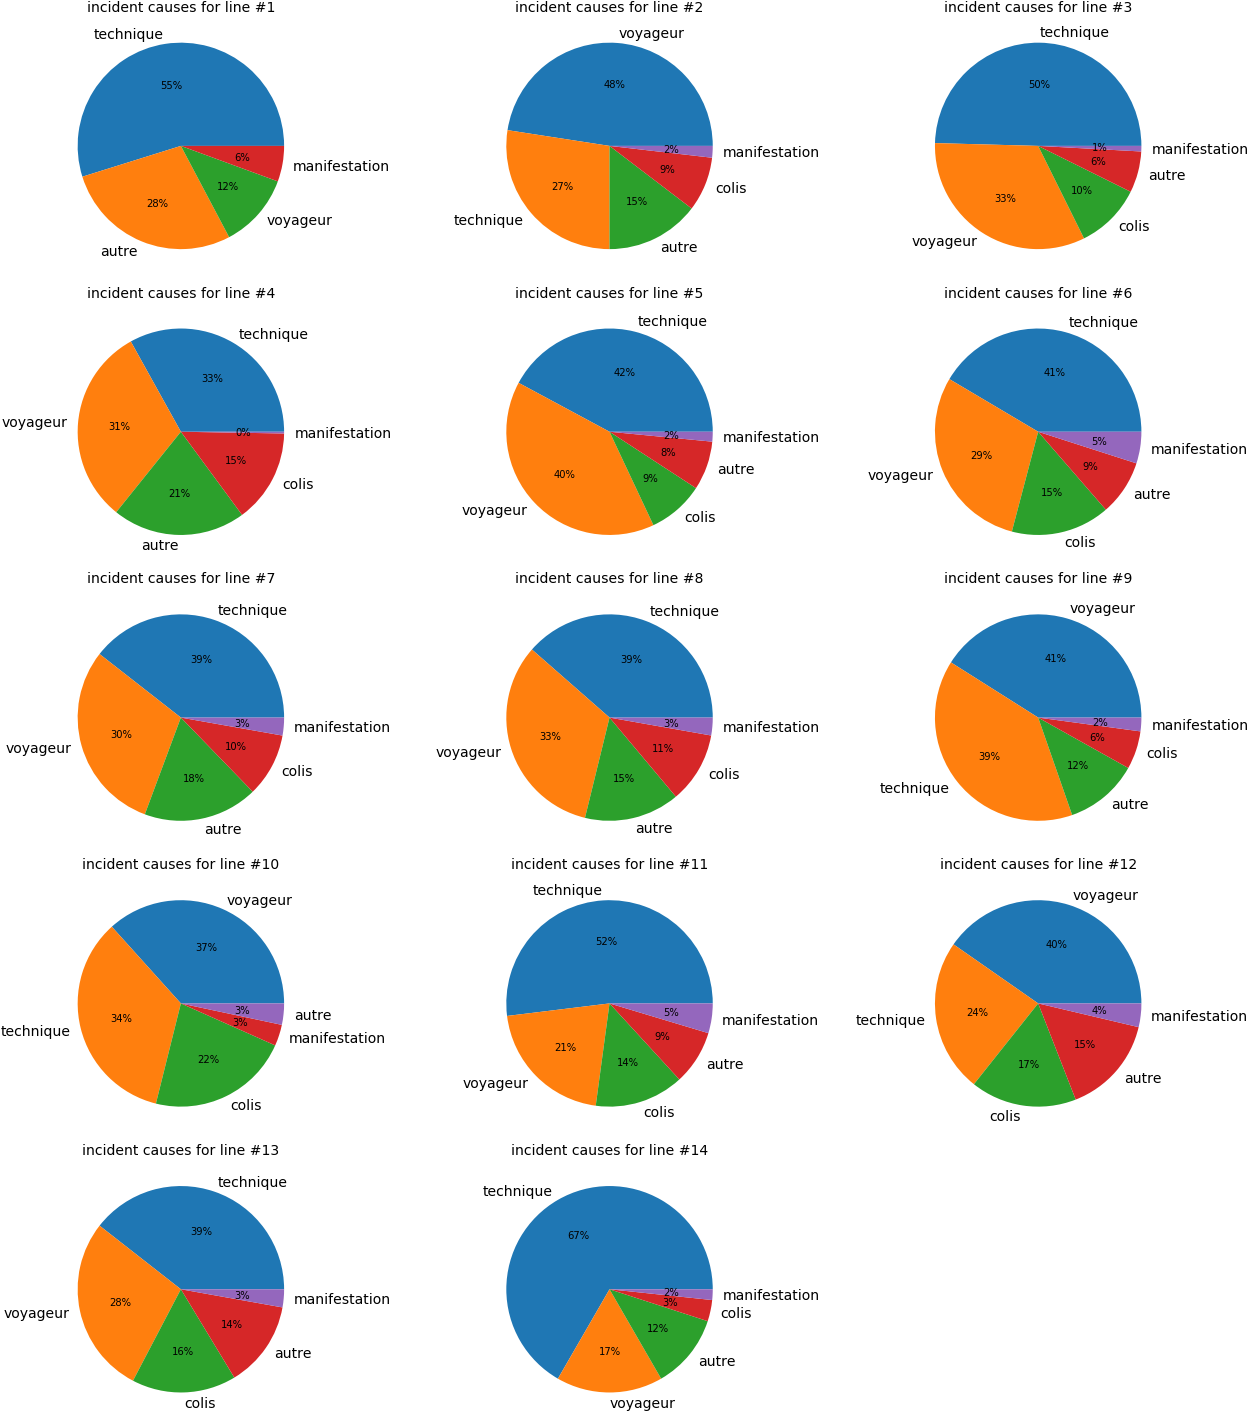

In [9]:
most_freq_cause = [None] * len(lines)
plt.figure(figsize=(18, 20))
for i, line in enumerate(lines):
    plt.subplot(5, 3, i + 1)
    causes, _ = ratp_line[line].plot_cause(year=2018)
    most_freq_cause[i] = causes[0]
    plt.title("incident causes for line #" + str(line))

plt.tight_layout()

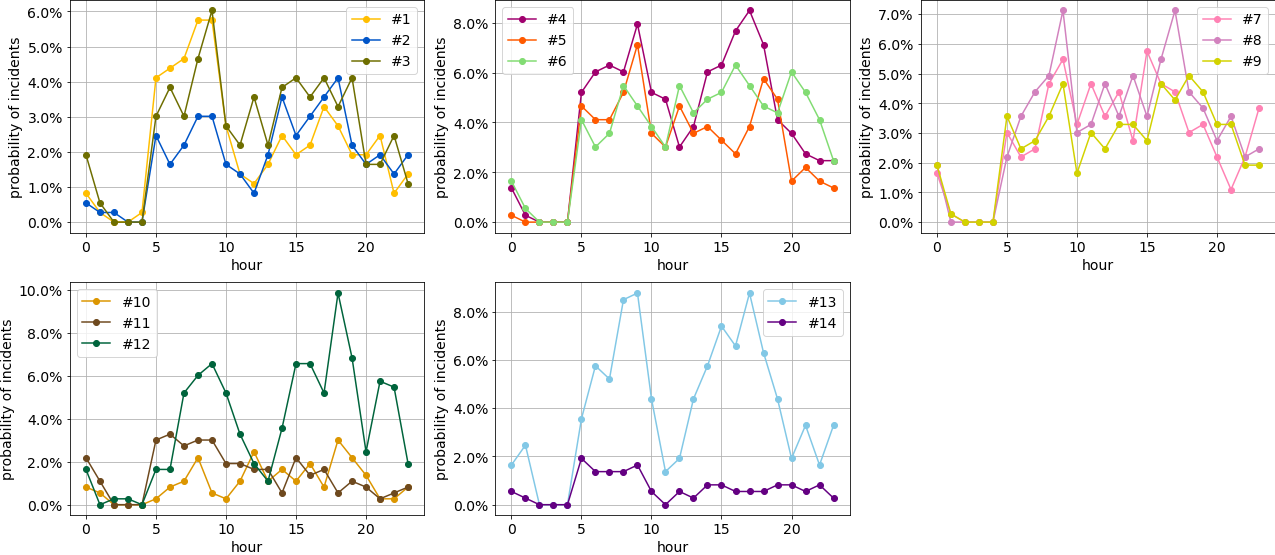

In [10]:
plt.figure(figsize=(18, 8))
lines_split = np.array_split(lines, 5)
incident_prob_hour_line = np.zeros((len(lines), 24))
for i, split in enumerate(lines_split):
    plt.subplot(2, 3, i + 1)
    for line in split:
        x, incident_prob_hour_line[line - 1] = ratp_line[line].plot_prob(by="hour", year=2018)
    plt.legend(["#" + str(x) for x in split])

plt.grid()
plt.tight_layout()

### Mean probability of incidents by hour among all lines

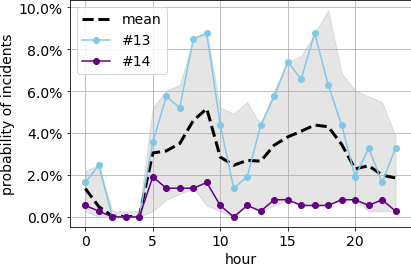

In [11]:
incident_prob_hour_line_mean = incident_prob_hour_line.mean(axis=0)
incident_prob_hour_line_min = incident_prob_hour_line.min(axis=0)
incident_prob_hour_line_max = incident_prob_hour_line.max(axis=0)
hour = range(24)
plt.plot(hour, incident_prob_hour_line_mean, "k--", linewidth=3)
plt.fill_between(hour, incident_prob_hour_line_min, incident_prob_hour_line_max, color="k", alpha=0.1)

ratp_line[13].plot_prob(by="hour", year=2018)
ratp_line[14].plot_prob(by="hour", year=2018)

plt.legend(["mean", "#13", "#14"])
plt.grid()
plt.tight_layout()

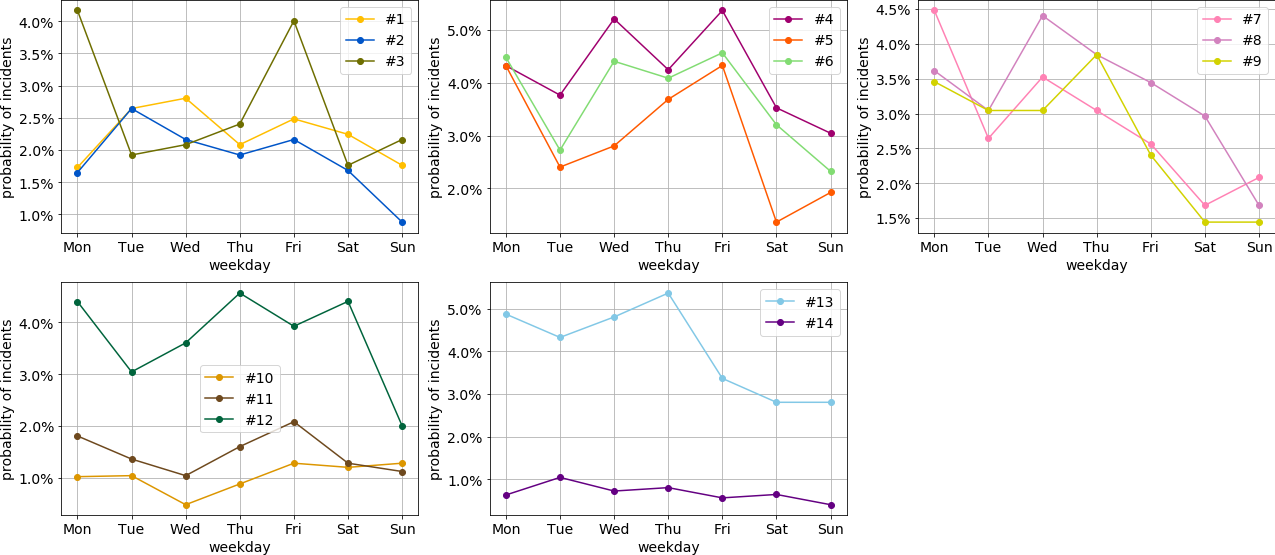

In [12]:
plt.figure(figsize=(18, 8))
lines_split = np.array_split(lines, 5)
for i, split in enumerate(lines_split):
    plt.subplot(2, 3, i + 1)
    for line in split:
        ratp_line[line].plot_prob(by="weekday", year=2018)
    plt.legend(["#" + str(x) for x in split])

plt.grid()
plt.tight_layout()

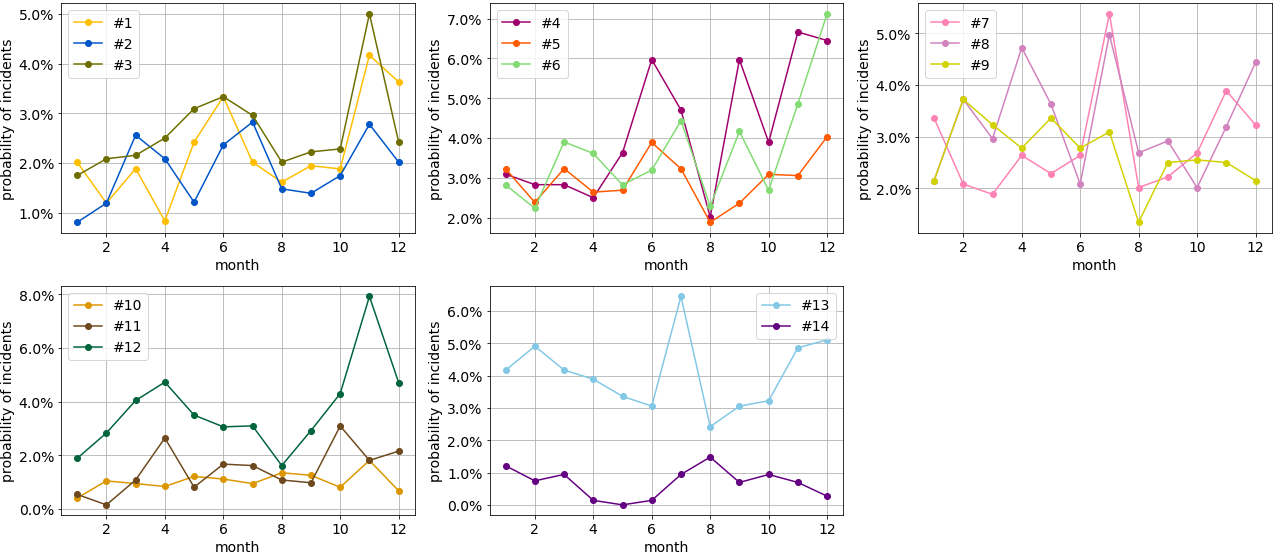

In [19]:
plt.figure(figsize=(18, 8))
lines_split = np.array_split(lines, 5)
for i, split in enumerate(lines_split):
    plt.subplot(2, 3, i + 1)
    for line in split:
        ratp_line[line].plot_prob(by="month", year=2018)
    plt.legend(["#" + str(x) for x in split])

plt.grid()
plt.tight_layout()

## Further analyses

### More incidents at rush hours?

The rush hours are defined as from 08:00 to 09:59 and from 17:00 to 19:59. 

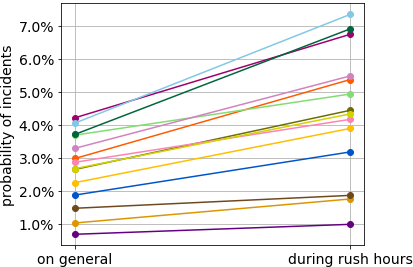

In [20]:
def plot_bar_comparison(mask_string, label, year=2018):
    mask = np.zeros_like(mean_incident_prob)
    for i, line in enumerate(lines):
        df = ratp_line[line]._df_processed_loc_year(year=year)
        mask[i] = df[eval(mask_string)]["is_incident"].mean()

    all_mean = mean_incident_prob.mean()
    all_min = mean_incident_prob.min(); all_min_who = mean_incident_prob.argmin() + 1
    all_max = mean_incident_prob.max(); all_max_who = mean_incident_prob.argmax() + 1
    mask_mean = mask.mean()
    mask_min = mask.min(); mask_min_who = mask.argmin() + 1
    mask_max = mask.max(); mask_max_who = mask.argmax() + 1
    yerr = np.array([[all_mean - all_min, mask_mean - mask_min],
                     [all_max - all_mean, mask_max - mask_mean]])
    x = [0, 1]
    dx = 0.02
    dy = 0.001
    plt.bar(x, [all_mean, mask_mean], width=0.4, yerr=yerr, color=["C0", "C1"])
    plt.text(x[0] + dx, all_min + dy, f"#{all_min_who}", fontsize=14)
    plt.text(x[0] + dx, all_max - dy, f"#{all_max_who}", fontsize=14)
    plt.text(x[1] + dx, mask_min + dy, f"#{mask_min_who}", fontsize=14)
    plt.text(x[1] + dx, mask_max - dy, f"#{mask_max_who}", fontsize=14)

    plt.xticks(x, ["on general", label])
    plt.ylabel("probability of incidents")
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: "{:.1%}".format(x))) 
    plt.tight_layout()

def plot_parallel_comparison(mask_string, label, year=2018):
    x = [0, 1]
    for line in lines:
        df = ratp_line[line]._df_processed_loc_year(year=year)
        mask = df[eval(mask_string)]["is_incident"].mean()
        plt.plot(x, [mean_incident_prob[line - 1], mask], "-o", color=ratp_line[line].color)

    plt.xticks(x, ["on general", label])
    plt.ylabel("probability of incidents")
    plt.grid()
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: "{:.1%}".format(x))) 
    plt.tight_layout()

plot_parallel_comparison("df['hour'].isin([8, 9, 17, 18, 19])", "during rush hours")

### Less incidents during weekend?

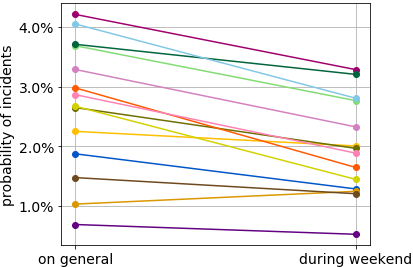

In [21]:
plot_parallel_comparison("df['weekday'].isin([5, 6])", "during weekend", year=2018)

### Less incidents during vacations?

In general less (Parisian) people in May, July and August...

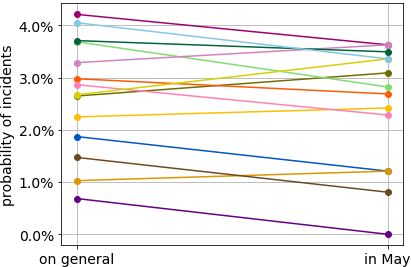

In [22]:
plot_parallel_comparison("df['month'] == 5", "in May", year=2018)

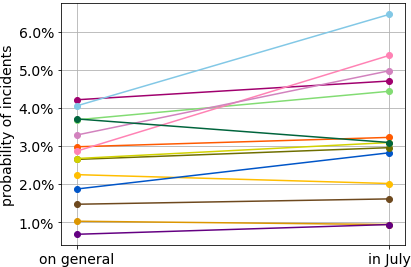

In [23]:
plot_parallel_comparison("df['month'] == 7", "in July", year=2018)

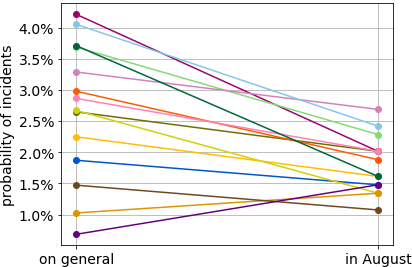

In [24]:
plot_parallel_comparison("df['month'] == 8", "in August", year=2018)

## Work in progress

<Figure size 432x288 with 0 Axes>

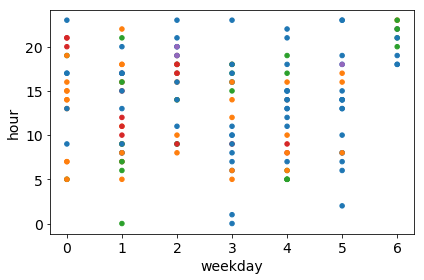

In [116]:
year = 2018
df_resampled = line2._df_processed_loc_year(year)
df_incident = df_resampled[df_resampled["is_incident"] == True]
causes = list(line2.plot_cause(year=year)[0])
colors = [f"C{i}" for i in range(len(causes))]
color_of_cause = dict(zip(causes, colors))
colors_incident = df_incident["incident_cause"].map(color_of_cause).values
plt.clf()
df_incident.plot.scatter("weekday", "hour", c=colors_incident)
plt.tight_layout()